In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression
#os.chdir('c:\proyecto')

data = np.load('proyecto_training_data.npy')

(array([ 12.,  32., 113., 260., 355., 340., 203., 100.,  38.,   7.]),
 array([-3.07985824, -2.45346659, -1.82707494, -1.20068328, -0.57429163,
         0.05210002,  0.67849167,  1.30488333,  1.93127498,  2.55766663,
         3.18405829]),
 <BarContainer object of 10 artists>)

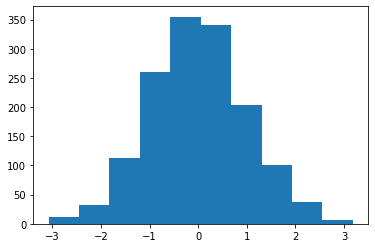

In [30]:
#distribucion normal de la longitud del dataset para luego dividrlo y tomar el 80% para entrenamiento
distri = np.random.randn(len(data))

plt.hist(distri)

In [31]:
#obtenemos para el 80% para entrenar

check = (distri<0.80)
training = np.nan_to_num(data[check])   #80% de la data
testing   = np.nan_to_num(data[~check])  #80% de la data


In [32]:
len(training),len(testing)

(1161, 299)

In [33]:
columna = ["SalePrice","OverallQual","1stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"]

dt = pd.DataFrame(training,columns=columna)

In [34]:
def calcula_estadisitica(arr,columna):
    print("  Media:", np.mean(arr[columna]))
    print("  Maximo: ", np.max(arr[columna]))
    print("  Minimo: ", np.min(arr[columna]))
    print("  Rango: ", np.ptp(arr[columna],axis=0))
    print("  Std   : ", np.std(arr[columna]))

In [35]:
def grafica_distplot(filas,columnas,dato):
    fila = 0
    columna = 0
    a, axes = plt.subplots(filas, columnas, figsize=(17, 10))
    for i in dato.columns:
        if columna == (columnas):
            fila += 1
            columna = 0
        sns.distplot(dato[i],ax=axes[fila,columna])
        columna += 1

In [36]:
def grafica_correlacion(filas, columnas,dato,correla):
    fila = 0
    columna = 0
    fig, axs = plt.subplots(filas, columnas, figsize=(17, 10))
    for i in dato.columns:
        if columna == (columnas):
            fila += 1
            columna = 0
        axs[fila,columna].scatter(dato[i],dato['SalePrice'])
        axs[fila,columna].set_title(i +' coeficiente: '+ str(round(correla[i][0],4)))
        columna += 1
    #+ str(correla[i][1]

In [37]:
for i in dt.columns:
    print("Datos estadisitos de: ",i)
    print(calcula_estadisitica(dt,i))

Datos estadisitos de:  SalePrice
  Media: 180080.05684754523
  Maximo:  755000.0
  Minimo:  34900.0
  Rango:  720100.0
  Std   :  78437.78651715517
None
Datos estadisitos de:  OverallQual
  Media: 6.087855297157622
  Maximo:  10.0
  Minimo:  1.0
  Rango:  9.0
  Std   :  1.3837492789217196
None
Datos estadisitos de:  1stFlrSF
  Media: 1161.5167958656332
  Maximo:  3138.0
  Minimo:  334.0
  Rango:  2804.0
  Std   :  367.07835230247
None
Datos estadisitos de:  TotRmsAbvGrd
  Media: 6.526270456503014
  Maximo:  14.0
  Minimo:  2.0
  Rango:  12.0
  Std   :  1.592253196604972
None
Datos estadisitos de:  YearBuilt
  Media: 1970.6141257536606
  Maximo:  2010.0
  Minimo:  1872.0
  Rango:  138.0
  Std   :  30.381880796598306
None
Datos estadisitos de:  LotFrontage
  Media: 58.094745908699394
  Maximo:  313.0
  Minimo:  0.0
  Rango:  313.0
  Std   :  33.86401312558645
None


C:\Users\amartinez\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\amartinez\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\amartinez\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

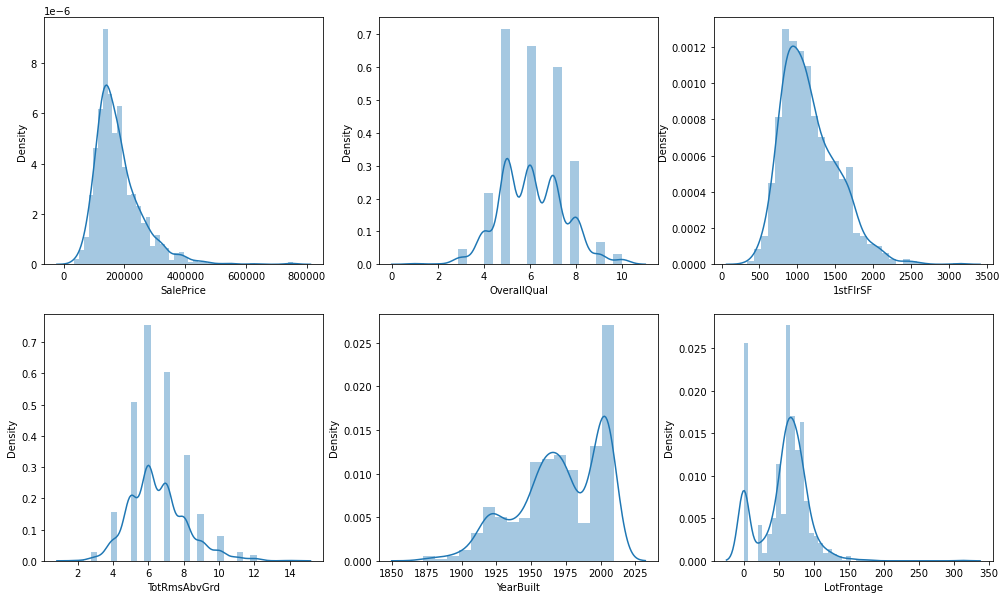

In [38]:
# gráficamos histrograma 
grafica_distplot(2,3,dt)       

In [39]:
# matriz de correlacion entre las variables.
correlacion = dt.corr()

In [40]:
correlacion

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice,1.000000,0.789245,0.619311,0.506060,0.517153,0.208975
OverallQual,0.789245,1.000000,0.472970,0.405910,0.566987,0.162661
1stFlrSF,0.619311,0.472970,1.000000,0.386497,0.300451,0.212660
TotRmsAbvGrd,0.506060,0.405910,0.386497,1.000000,0.069845,0.204487
YearBuilt,0.517153,0.566987,0.300451,0.069845,1.000000,0.049154
LotFrontage,0.208975,0.162661,0.212660,0.204487,0.049154,1.000000


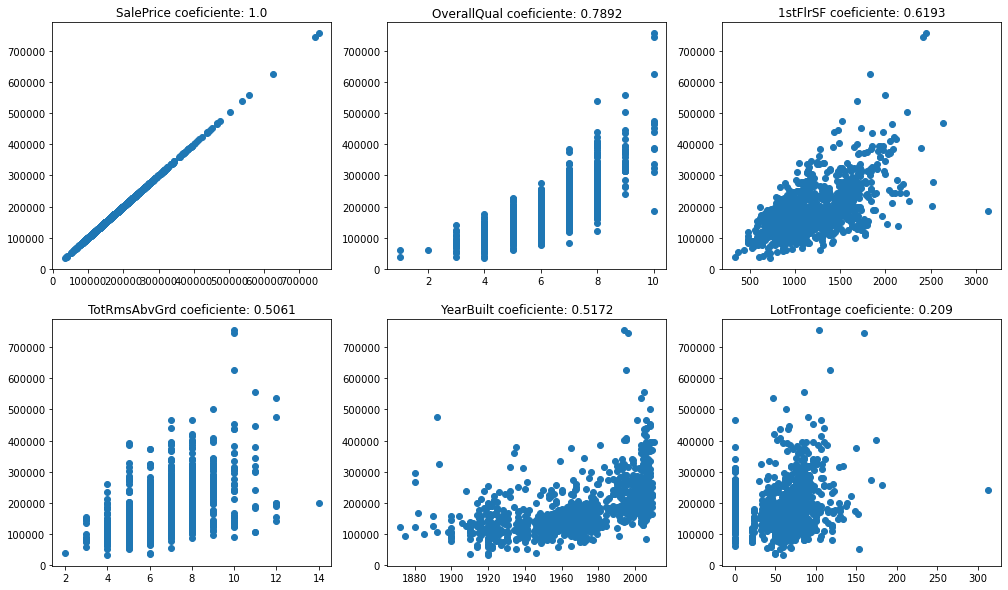

In [41]:
#Gráfiamos correlación
grafica_correlacion(2,3,dt,correlacion)

### observamos las que tienen más correlación con SaelePrice es:
### OverallQual  y 1stFlrSF

In [42]:
def entrenar_modelo(x,y,epochs,error_cada,lr=0.00001):
    #creamos matriz con x y con la otra columna de uno
    array_x  = np.column_stack((x,np.ones_like(y)))
    mb= np.array([0,0])        
    modelo = {}
    error = np.zeros(epochs)
    contador = 1
    for i in range(epochs):
        modelo[i] = mb
        #product punto operación vectorizada
        yhat = np.matmul(array_x,mb)
        #error 
        error[i]  = np.average((np.power(yhat-y,2)/2))
        #Mostrams el error en cada iteración
        if contador == error_cada:
            print(i+1,": Error: ", error[i])
            contador = 0
        contador+=1
        diferencia = yhat - y 
        gradiantes = np.matmul(diferencia,array_x) / diferencia.shape[0]
        #print(array_x)
        mb = [mb[0]-lr*gradiantes[0], mb[1]-lr*gradiantes[1]]
    return modelo,error        

In [43]:
def grafica_error(error):
    xx = np.linspace(1,len(error),len(error))
    yy = error    
    plt.plot(xx,yy,linestyle = 'dashed')
    plt.xlabel('Iteracion')
    plt.ylabel('Error')
    plt.title('Grafica de error')
    plt.show()


In [44]:
def grafica_modelo_train(modelo,x,y,n):
    #iteraciones = n/3
    
    for i in range(len(modelo)):
        if i % n == 0:   
            #print('here: ',i)
            y_predict= modelo[i][0]*x + modelo[i][1]    
            y_predict = y_predict.tolist()
            x_list = x.tolist() 
            y_actual = y.tolist()
            datos = pd.DataFrame(
                    {
                        "x":x_list,
                        "y_actual":y_actual,
                        "y_prediccion":y_predict
                    }
                )
            %matplotlib inline
            plt.plot(datos["x"], datos["y_prediccion"])
            plt.plot(datos["x"], datos["y_actual"], "ro")
            plt.title("Valor Actual vs Predicción en el tiempo "+str(i))
            plt.show()


In [45]:
x = np.array([65,80,68])
y = np.array([208.5,181.5,223.5])

In [46]:
modelo,error= entrenar_modelo(x,y, 49,10,0.00001)

10 : Error:  8597.232491658842
20 : Error:  3414.6624162921494
30 : Error:  1589.3608189656104
40 : Error:  946.4890643103766


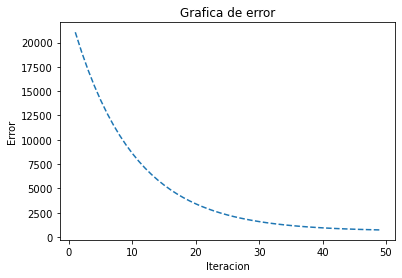

In [47]:
grafica_error(error)

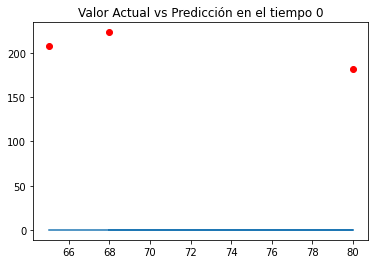

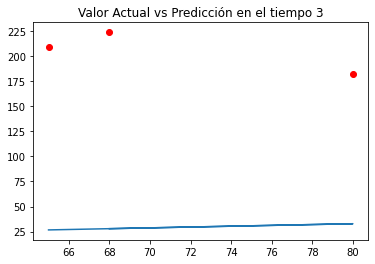

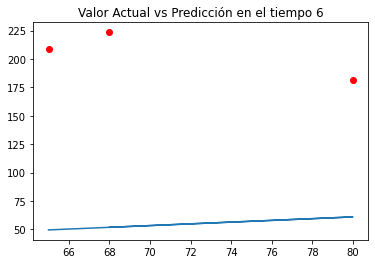

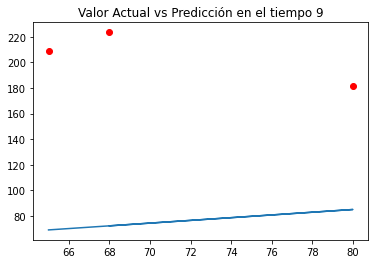

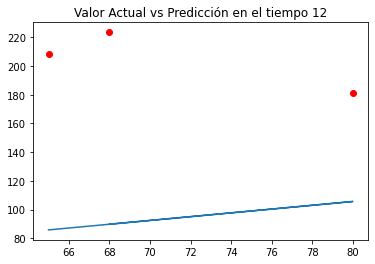

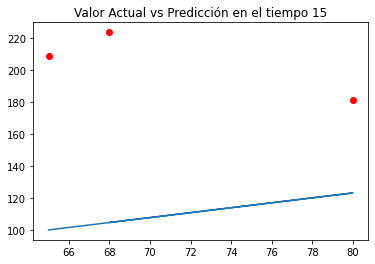

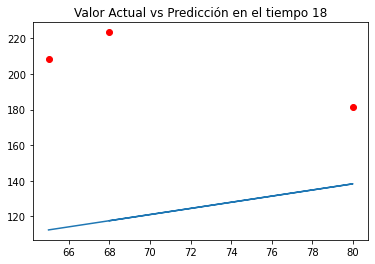

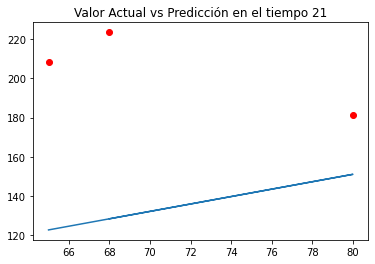

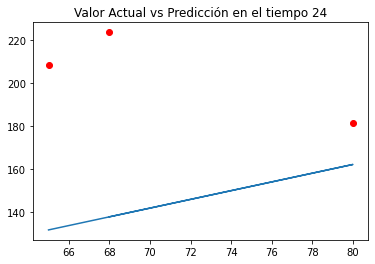

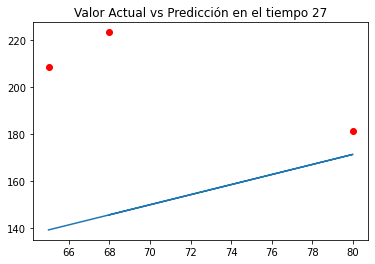

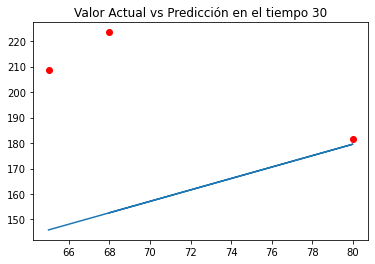

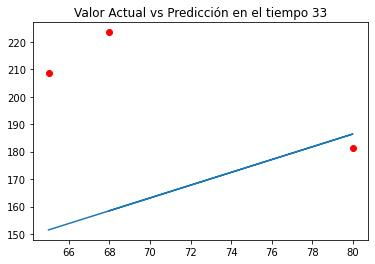

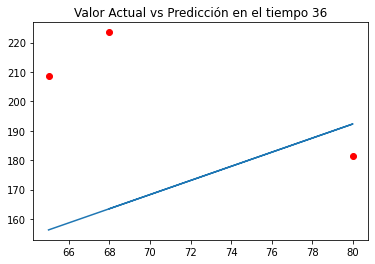

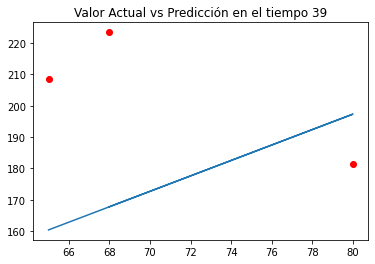

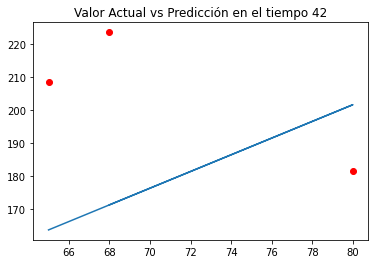

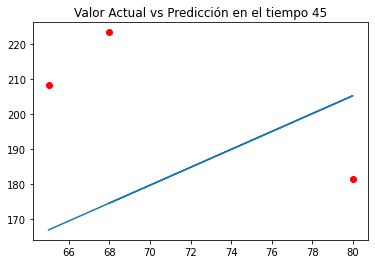

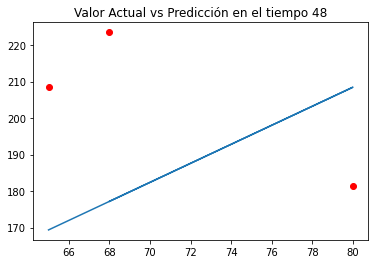

In [48]:
datos = grafica_modelo_train(modelo, x, y, 3)


In [49]:
modelo,error = entrenar_modelo(dt['OverallQual'],dt['SalePrice'], 2000,10,0.04)
grafica_error(modelo,error)

10 : Error:  1384536189.903216
20 : Error:  1374472679.7311058
30 : Error:  1366393999.9763823
40 : Error:  1358619717.1161954
50 : Error:  1351138310.4031837
60 : Error:  1343938746.47872
70 : Error:  1337010407.639409
80 : Error:  1330343076.1765702
90 : Error:  1323926919.3074598
100 : Error:  1317752474.6741798
110 : Error:  1311810636.3888674
120 : Error:  1306092641.6046073
130 : Error:  1300590057.5922415
140 : Error:  1295294769.3040292
150 : Error:  1290198967.4058194
160 : Error:  1285295136.760073
170 : Error:  1280576045.3427603
180 : Error:  1276034733.5777898
190 : Error:  1271664504.0732296
200 : Error:  1267458911.7441907
210 : Error:  1263411754.3078105
220 : Error:  1259517063.1363087
230 : Error:  1255769094.4546294
240 : Error:  1252162320.8696957
250 : Error:  1248691423.2187717
260 : Error:  1245351282.7249215
270 : Error:  1242136973.4479852
280 : Error:  1239043755.0199525
290 : Error:  1236067065.6540046
300 : Error:  1233202515.4169302
310 : Error:  1230445879

TypeError: grafica_error() takes 1 positional argument but 2 were given

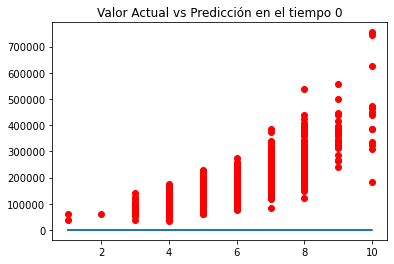

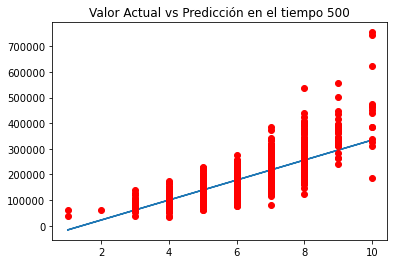

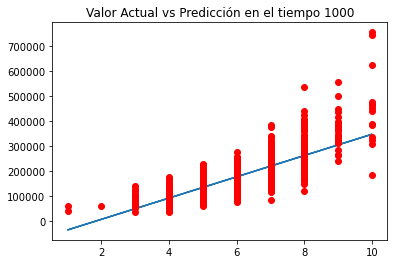

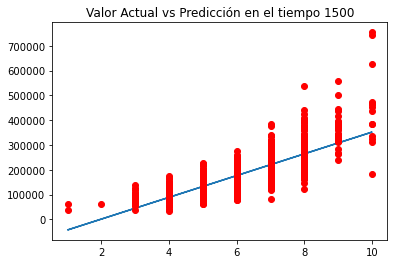

In [50]:
datos = grafica_modelo_train(modelo, dt['OverallQual'], dt['SalePrice'], 500)

In [51]:
## scikit-learn

lm1 = LinearRegression()
lm2 = LinearRegression()
OverallQual = np.array([dt['OverallQual'].tolist()])
O1stFlrSF    = np.array([dt['1stFlrSF'].tolist()])
SalePrice    = np.array(dt['SalePrice'].tolist())
modelo_OverQual_sklearn = lm1.fit(OverallQual.reshape(-1,1),SalePrice)
modelo_1stFlrSF_sklearn = lm2.fit(O1stFlrSF.reshape(-1,1),SalePrice)

In [52]:
def predicciones(modelo_normal, modelo_sklearn, x):
    y_pred_manual = modelo_normal[0]*x + modelo_normal[1]
    y_pred_sklean = modelo_sklearn.predict(x.reshape(-1,1))
    #y_pred_manual=[]
    return y_pred_manual,y_pred_sklean,(y_pred_manual+y_pred_sklean)/2

In [53]:
def grafica_comparacion(y_pred_manual,y_pred_sklean,promedio,x):
    y_pre_manual_list = y_pred_manual.tolist()
    y_pred_sklean_list =y_pred_sklean.tolist()
    promedio_list     = promedio.tolist()
    x_list            = x.tolist()
    datos = pd.DataFrame(
            {
                "x":x_list,
                "y_manual":y_pre_manual_list,
                "y_sklean":y_pred_sklean_list,
                "promedio":promedio_list
            }
        )
    %matplotlib inline
    plt.plot(datos["x"], datos["y_manual"], "r")
    plt.plot(datos["x"], datos["y_sklean"], "b")
    plt.plot(datos["x"], datos["promedio"], "g")
    
    plt.title("Valor Actual vs Predicción en el tiempo "+str(i))
    plt.show()
    return datos

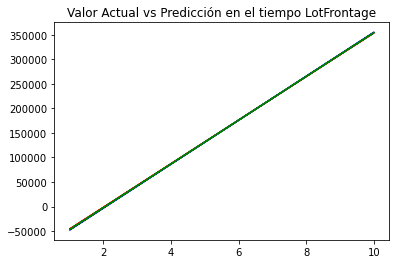

,x,y_manual,y_sklean,promedio
0,7.0,220690.275684,220887.876315,220789.076000
1,6.0,176278.300850,176149.558655,176213.929753
2,7.0,220690.275684,220887.876315,220789.076000
3,8.0,265102.250518,265626.193975,265364.222247
4,5.0,131866.326016,131411.240995,131638.783506


In [54]:
y_manual,y_sklean,y_promedio =predicciones(modelo[len(modelo.keys())-1],modelo_OverQual_sklearn,OverallQual[0])

ver = grafica_comparacion(y_manual,y_sklean,y_promedio,dt['OverallQual'])
ver.head()